In [20]:
import numpy as np

In [21]:
dict1 = {'我', '在', '燕山大学', '读书', '专业', '是', '软件工程', '燕山', '大学', '软件', '工程'}
sentence1 = '我在燕山大学读书，专业是软件工程。' 

In [22]:
dict = {'今日', '阳光明媚', '光明', '明媚', '阳光', '我们', '在', '在野', '生动', '野生', '动物园', '野生动物园', '物', '园', '玩'}
sentence = '我们在野生动物园玩' 

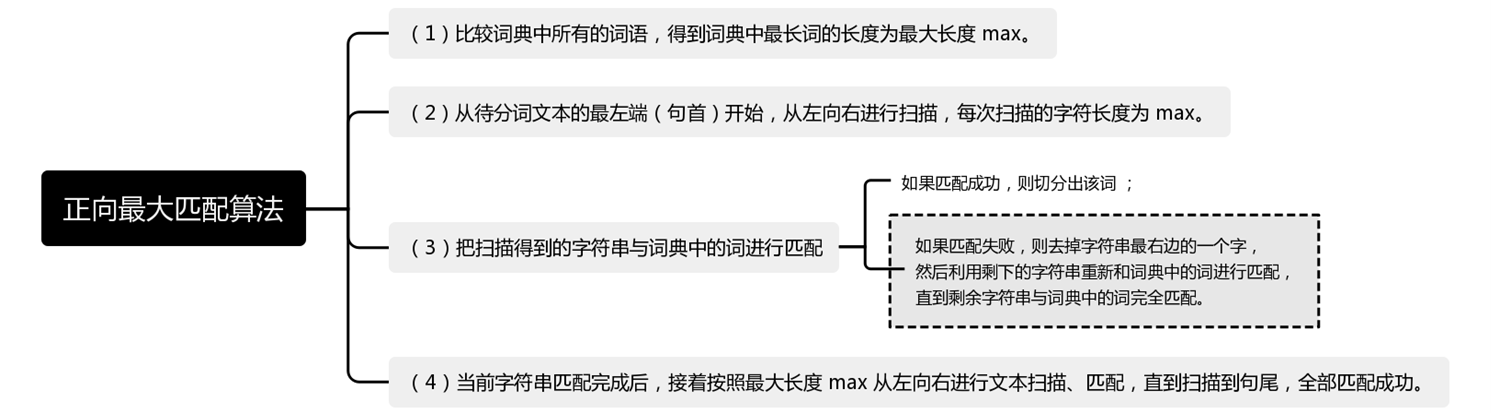

In [23]:
# 正向最大匹配算法FMM函数，参数dict: 词典 ，参数sentence: 句子 
def FMM(dict, sentence):                           
    fmmresult = []
    # max_len定义为词典中最长词长度 
    max_len = max([len(item) for item in dict])    
    start = 0 
    # FMM 为正向，start 从初始位置开始，指向结尾即为结束 
    while start != len(sentence):    
        # index 的初始值为 start 的索引 + 词典中元素的最大长度或句子末尾               
        index = start + max_len                    
        if index > len(sentence): 
           index = len(sentence) 
        for i in range(max_len): 
            # 当分词在字典中时或分到最后一个字时，将其加入到结果列表中 
            if (sentence[start:index] in dict) or (len(sentence[start:index]) == 1): 
                # print(sentence[start:index], end='/')     
                fmmresult.append(sentence[start:index])     
                # 分出一个词，start 设置到 index 处 
                start = index                      
                break     
            # 如果匹配失败，则去掉最后一个字符，重新匹配
            index += -1                           
    return fmmresult

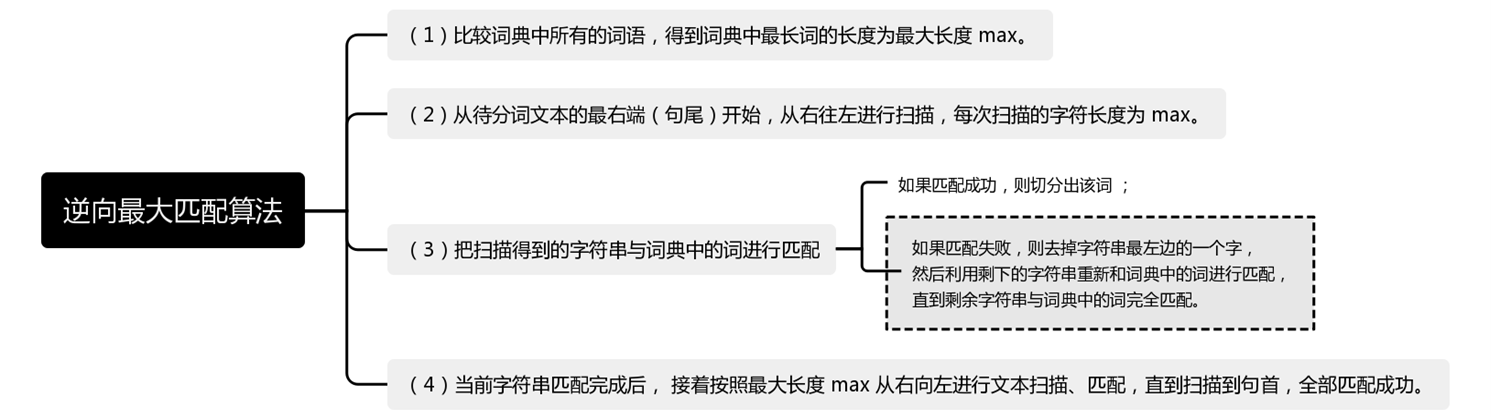

In [24]:
# 逆向最大匹配算法RMM函数，参数dict: 词典 ，参数sentence: 句子 
def RMM(dict, sentence):                             
    rmmresult = [] 
    max_len = max([len(item) for item in dict])
    # max_len定义为词典中最长词长度       
    start = len(sentence) 
    # RMM 为逆向，start 从末尾位置开始，指向开头位置即为结束 
    while start != 0: 
        # 逆向时 index 的初始值为 start 的索引 - 词典中元素的最大长度或句子开头                                
        index = start - max_len                      
        if index < 0: 
           index = 0
        for i in range(max_len): 
            # 当分词在字典中时或分到最后一个字时，将其加入到结果列表中 
            if (sentence[index:start] in dict) or (len(sentence[index:start]) == 1): 
                # print(sentence[index:start], end='/') 
                rmmresult.insert(0, sentence[index:start])   
                # 分出一个词，start 设置到 index 处 
                start = index                         
                break   
            # 如果匹配失败，则去掉最前面一个字符，重新匹配                                 
            index += 1                                
    return rmmresult

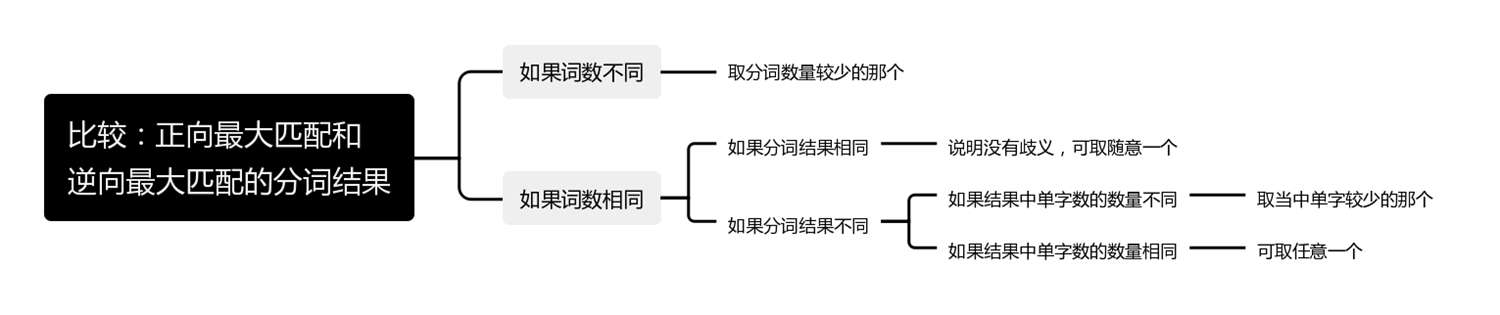

In [25]:
# 双向最大匹配（BM），参数dict: 词典 ，参数sentence: 句子 
def BM(dict, sentence):            
    res1 = FMM(dict, sentence)     # res1 为 FMM 结果 
    res2 = RMM(dict, sentence)     # res2 为 RMM 结果
    if len(res1) == len(res2):     # 若分词数相同，则分情况讨论
        if res1 == res2:           # 若FMM 与 RMM 的结果相同，则可取任意一个 
            return res1 
        else:                      # res1_sn 和 res2_sn 为两个分词结果的单字数量，若二者不同，则返回单字较少的 
            res1_sn = len([i for i in res1 if len(i) == 1])  
            res2_sn = len([i for i in res2 if len(i) == 1]) 
            return res1 if res1_sn < res2_sn else res2 
    else:                          # 若分词数不同，则取分出词较少的 
        return res1 if len(res1) < len(res2) else res2

In [26]:
print("the results of FMM :\n", FMM(dict, sentence), end="\n")    # 调用FMM函数，输出FMM分词结果
print("the results of RMM :\n", RMM(dict, sentence), end="\n")    # 调用RMM函数，输出RMM分词结果
print("the results of BM :\n", BM(dict, sentence))                # 调用BM函数，输出BM分词结果

the results of FMM :
 ['我们', '在野', '生动', '物', '园', '玩']
the results of RMM :
 ['我们', '在', '野生动物园', '玩']
the results of BM :
 ['我们', '在', '野生动物园', '玩']


In [27]:
print("the results of FMM :\n", FMM(dict1, sentence1), end="\n")    # 调用FMM函数，输出FMM分词结果
print("the results of RMM :\n", RMM(dict1, sentence1), end="\n")    # 调用RMM函数，输出RMM分词结果
print("the results of BM :\n", BM(dict1, sentence1))                # 调用BM函数，输出BM分词结果

the results of FMM :
 ['我', '在', '燕山大学', '读书', '，', '专业', '是', '软件工程', '。']
the results of RMM :
 ['我', '在', '燕山大学', '读书', '，', '专业', '是', '软件工程', '。']
the results of BM :
 ['我', '在', '燕山大学', '读书', '，', '专业', '是', '软件工程', '。']
